# Bibliotecas

In [1]:
from metapy_toolbox import *
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
from fundacao import *

# Carregando dados

In [2]:
from pathlib import Path
dir=Path.cwd()
file_path=dir / "assets" / "toy_problem_copy.xlsx"
# df = pd.read_excel(r"/home/wmpjrufg/Documents/fundaIA/assets/toy_problem.xlsx") # Prof. Wanderlei
df = pd.read_excel(file_path) # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_2.xlsx") # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_3.xlsx") # Prof. Wanderlei casa
n_comb = 3
f_ck = 25000
cob_m = 0.04


# Pop inicial de possíveis soluções

In [3]:
n_population = 300
seed = 42

In [4]:
x_lower = [0.60] * len(df) * 3
x_upper = [5.00] * len(df) * 3
n_dimensions = len(df) * 3
pop2d = initial_population_01(n_population, n_dimensions, x_lower, x_upper, seed, use_lhs=True)

# Gerando dataset completo

In [8]:
cols = []
for i in range(len(df)):
    cols.append(f'hx{i}')
    cols.append(f'hy{i}')
    cols.append(f'hz{i}')
df_pop_A = pd.DataFrame(pop2d, columns=cols)
args = [df, n_comb, f_ck, cob_m, 1e1]
def wrapper(x):
    return obj_teste(x, args)[0]
vol = Parallel(n_jobs=-1)(delayed(wrapper)(x) for x in pop2d)
df_pop_A['volume (m3)'] = vol
df_pop_A

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
0,3.404649,0.754896,4.092741,3.977772,4.353285,1.451024,4.930170,1.219138,3.399454,74.445363
1,4.553394,4.730562,3.827741,3.802557,4.254599,1.282830,4.630000,2.293199,2.857731,151.056846
2,0.778528,3.377402,3.947548,4.525467,1.011096,2.141568,1.615250,4.425145,4.890488,64.441383
3,0.848691,4.968404,3.244649,4.387743,1.113810,3.440555,3.689233,3.057113,3.603888,79.225939
4,4.044761,2.074356,2.943339,2.848843,1.077588,4.225121,1.792396,1.724752,2.553127,63.367137
...,...,...,...,...,...,...,...,...,...,...
295,2.874405,2.119548,3.173040,3.487780,1.344689,4.841003,2.002184,3.600887,2.811059,79.256791
296,2.587456,2.700181,4.869538,2.417638,1.808903,4.890480,3.069657,2.177440,1.048820,78.678738
297,4.875746,2.292797,2.396652,4.831742,4.078672,4.798397,3.161660,2.876258,4.107480,174.238423
298,3.736415,2.410121,1.857149,4.945159,4.776498,3.142153,1.080258,1.281837,3.607420,110.735755


In [9]:
cols = []
for i in range(len(df)):
    cols.append(f'hx{i}')
    cols.append(f'hy{i}')
    cols.append(f'hz{i}')
df_pop_B = pd.DataFrame(pop2d, columns=cols)
args = [df, n_comb, f_ck, cob_m, 1e6]
def wrapper(x):
    return obj_teste(x, args)[0]
vol = Parallel(n_jobs=-1)(delayed(wrapper)(x) for x in pop2d)
df_pop_B['volume (m3)'] = vol
df_pop_B

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
0,3.404649,0.754896,4.092741,3.977772,4.353285,1.451024,4.930170,1.219138,3.399454,1.836784e+06
1,4.553394,4.730562,3.827741,3.802557,4.254599,1.282830,4.630000,2.293199,2.857731,1.751214e+06
2,0.778528,3.377402,3.947548,4.525467,1.011096,2.141568,1.615250,4.425145,4.890488,9.307279e+05
3,0.848691,4.968404,3.244649,4.387743,1.113810,3.440555,3.689233,3.057113,3.603888,8.084663e+05
4,4.044761,2.074356,2.943339,2.848843,1.077588,4.225121,1.792396,1.724752,2.553127,1.780872e+06
...,...,...,...,...,...,...,...,...,...,...
295,2.874405,2.119548,3.173040,3.487780,1.344689,4.841003,2.002184,3.600887,2.811059,1.695495e+06
296,2.587456,2.700181,4.869538,2.417638,1.808903,4.890480,3.069657,2.177440,1.048820,1.626014e+06
297,4.875746,2.292797,2.396652,4.831742,4.078672,4.798397,3.161660,2.876258,4.107480,1.553277e+06
298,3.736415,2.410121,1.857149,4.945159,4.776498,3.142153,1.080258,1.281837,3.607420,1.479810e+06


In [10]:
of_1e1, _ = obj_teste(pop2d[0], [df, n_comb, f_ck, cob_m, 1e1])
of_1e6, _ = obj_teste(pop2d[0], [df, n_comb, f_ck, cob_m, 1e6])
print(of_1e1, of_1e6)

74.44536271526599 1836784.4320171443


In [7]:
oi = df_pop_A.sort_values(by="volume (m3)", ascending=True)

oi

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
98,1.612948,1.737141,1.755781,3.747801,0.682220,1.522077,1.242945,1.572626,1.621688,26.997305
114,0.952769,2.955960,0.765169,2.002087,1.398427,2.892110,3.936536,0.704029,0.667184,29.401283
260,1.110835,1.038986,4.534658,1.490442,2.393385,0.716359,2.464683,1.907746,1.566696,31.399501
20,3.373602,3.754896,0.621723,1.739366,1.850010,2.350296,1.327853,1.390614,2.202380,32.123796
210,0.772658,4.798196,1.809208,1.083690,3.206027,1.301404,2.335714,3.382633,0.980381,32.786380
...,...,...,...,...,...,...,...,...,...,...
262,3.885493,3.897798,4.239816,4.485908,0.959661,4.121667,4.520910,3.449950,4.732138,171.820998
297,4.875746,2.292797,2.396652,4.831742,4.078672,4.798397,3.161660,2.876258,4.107480,174.238423
29,4.063905,2.340782,3.663223,3.094492,2.841572,4.790491,4.513747,4.998306,4.046356,184.113472
5,3.169530,4.774317,4.643771,2.261990,4.073950,4.923735,3.547892,4.181792,4.784916,202.725883


# Aprendizado de máquina do dataset

### Separação em x e y

In [ ]:
# x = df_pop.drop(columns=['volume (m3)'])
# y = df_pop [['volume (m3)']].reset_index(drop=True)
# y

,volume (m3)
0,74.445363
1,151.056846
2,64.441383
3,79.225939
4,63.367137
...,...
295,79.256791
296,78.678738
297,174.238423
298,110.735755


### Treinamento com adição de amostras

In [ ]:
# x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.30, random_state=seed)
# df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

In [13]:
def roda_pipe(df_pop_base, test_size=0.30):
    X= df_pop_base.drop(columns=['volume (m3)'])
    y= df_pop_base [['volume (m3)']].reset_index(drop=True)
    x_treino, x_teste, y_treino, y_teste= train_test_split(X, y, test_size=test_size, random_state=seed)
    df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)
    return df_gpr

In [15]:
df_gpr_A = roda_pipe(df_pop_A)
df_gpr_B = roda_pipe(df_pop_B)

/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:670: ConvergenceWarning: lbfgs failed to converge after 11 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [76]:
df_gpr_test_s40 = roda_pipe(df_pop_A, test_size=0.40)
df_gpr_test_s10 = roda_pipe(df_pop_A, test_size=0.10)

/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:670: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


#### Gráficos

In [ ]:
def pega_resultado_por_modelo(df_gpr, modelo_alvo):
    for item in df_gpr:
        if str(item["modelo"]) == str(modelo_alvo):
            return item
    raise ValueError(f"Modelo '{modelo_alvo}' não encontrado em df_gpr.")

In [ ]:
modelo_fixado = "gpr_com_kernel_k00"
res_A = pega_resultado_por_modelo(df_gpr_A, modelo_fixado)  # pen=1e6
res_B = pega_resultado_por_modelo(df_gpr_B, modelo_fixado)  # pen=1e1


In [ ]:
def plot_scatter_observed_predicted(res, n_train, out_name, penalty=None):
    dpi = 600

    data = pd.DataFrame({
        "Observed": list(res["y_obse"]["volume (m3)"]),
        "Predicted": list(res["y_pred"]["volume (m3)"]),
    })

    # 8x8 cm fixo
    b_cm, h_cm = 12, 11
    inches = 1 / 2.54
    fig, ax = plt.subplots(figsize=(b_cm * inches, h_cm * inches))

    ax.set_xlabel(r"Observed volume (m$^3$)", fontsize=12)
    ax.set_ylabel(r"Predicted volume (m$^3$)", fontsize=12)
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.grid(True, linestyle="-", linewidth=0.5, alpha=0.3)

    # y=x e limites
    lims = [min(data.min()), max(data.max())]
    ax.plot(lims, lims, linewidth=2, linestyle="--")
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Scatter SEM label (sem legenda e sem “bola” na legenda)
    ax.scatter(
        data["Observed"], data["Predicted"],
        alpha=0.4, s=25, color="red"
    )

    # Notação científica controlada nos eixos
    fmt = ScalarFormatter(useMathText=True)
    fmt.set_scientific(True)
    fmt.set_powerlimits((-2, 3))
    ax.xaxis.set_major_formatter(fmt)
    ax.yaxis.set_major_formatter(fmt)

    # Bloco de info dentro do gráfico (mantém)
    pen_txt = f"{penalty:.0e}" if penalty is not None else "n/a"
    info = (
        f"n_train: {n_train}\n"
        f"$R^2_{{test}}$: {res['R2_Teste']:.3f}"
    )
    ax.text(
        0.03, 0.97, info,
        transform=ax.transAxes,
        va="top", ha="left",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", alpha=0.8, edgecolor="none")
    )

    # Cabeçalho acima do eixo (duas linhas, sem marker)
    header1 = f"Model: {res['modelo']}"
    header2 = f"Penalty: {pen_txt}"
    fig.text(0.5, 0.985, header1, ha="center", va="top", fontsize=11)
    fig.text(0.5, 0.935, header2, ha="center", va="top", fontsize=11)

    # Reserva espaço para o cabeçalho
    fig.subplots_adjust(top=0.82)

    fig.savefig(f"/asses/graphicsz_{out_name}_pt.png", dpi=dpi)
    plt.show()
    plt.close(fig)

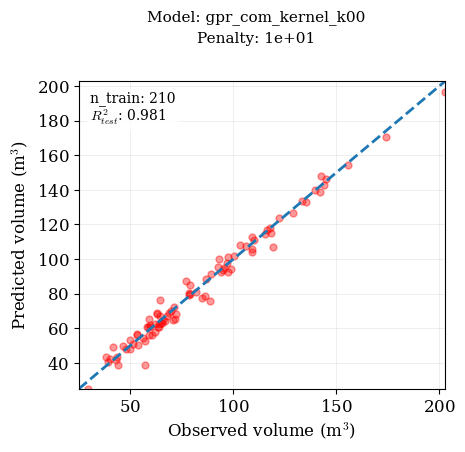

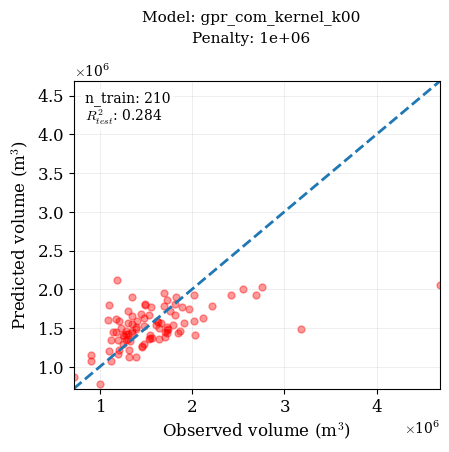

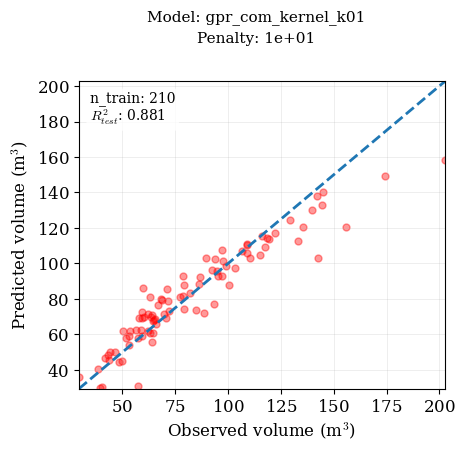

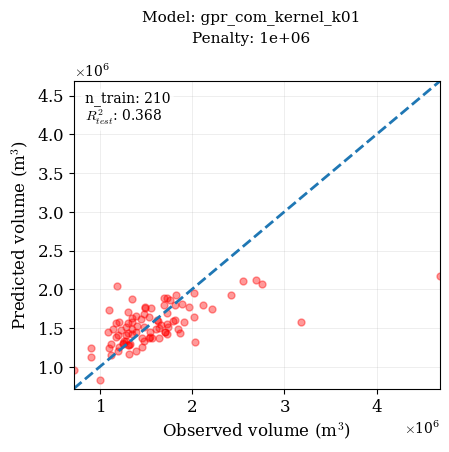

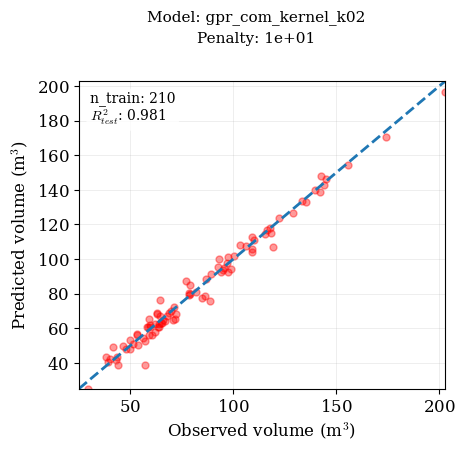

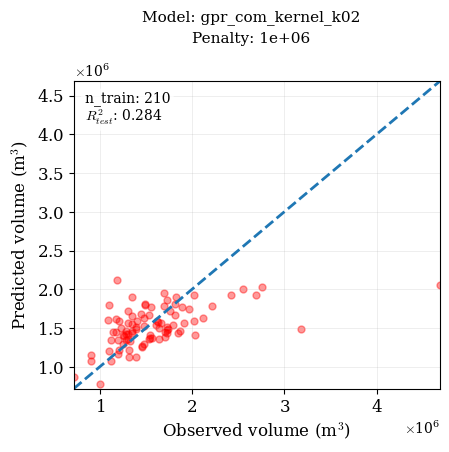

In [60]:
N = len(df_pop_A)
n_treino = int((1 - 0.30) * N)
modelos = [str(r["modelo"]) for r in df_gpr_A]  

for modelo in modelos:
    res_A = pega_resultado_por_modelo(df_gpr_A, modelo)
    res_B = pega_resultado_por_modelo(df_gpr_B, modelo)

    plot_scatter_observed_predicted(res_A, n_treino, "penalty_1e6_kernel_k00", penalty=1e1)
    plot_scatter_observed_predicted(res_B, n_treino, "penalty_1e1_kernel_k00", penalty=1e6)

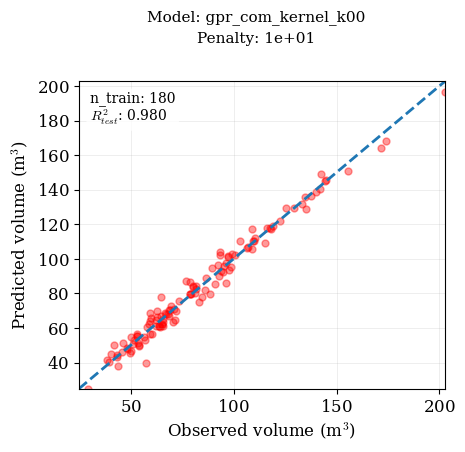

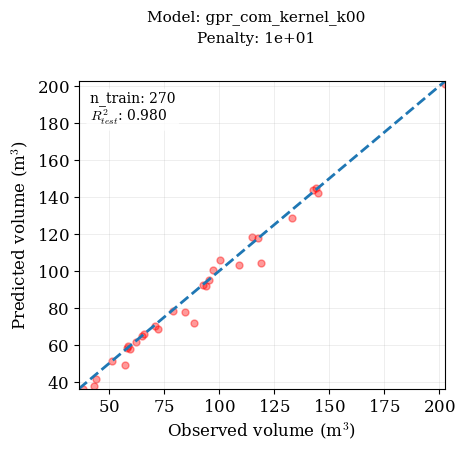

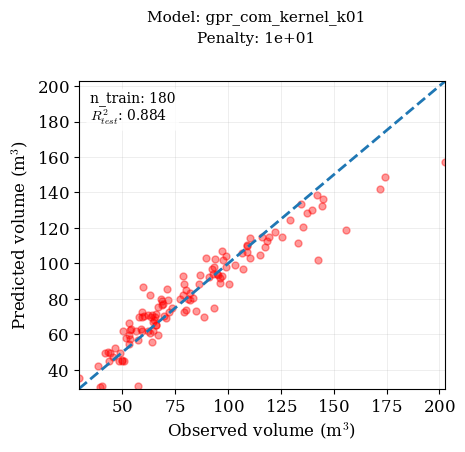

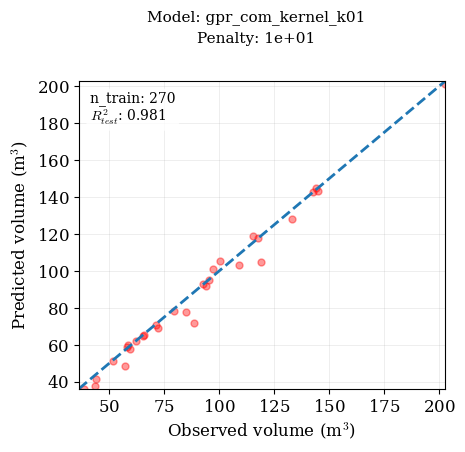

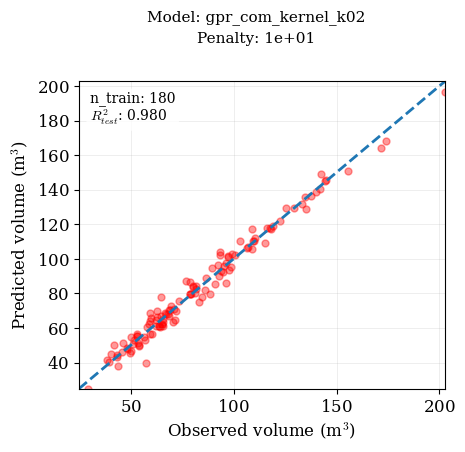

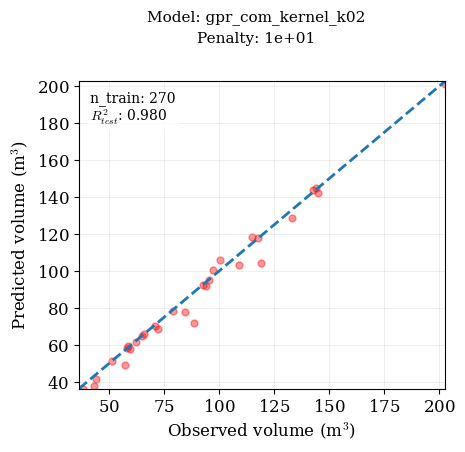

In [78]:
n_train_40 = int((1 - 0.40) * N)
n_train_10 = int((1 - 0.10) * N)
for modelo in modelos:
    res_40 = pega_resultado_por_modelo(df_gpr_test_s40, modelo)
    res_10 = pega_resultado_por_modelo(df_gpr_test_s10, modelo)

    plot_scatter_observed_predicted(res_40, n_train_40, out_name=f"test_size_40pct_{modelo}", penalty=1e1)
    plot_scatter_observed_predicted(res_10, n_train_10, out_name=f"test_size_10pct_{modelo}", penalty=1e1)

In [73]:
def monta_tabela_metricas(df_gpr, penalty, n_train):
    linhas = []
    for r in df_gpr:
        linhas.append({
            "Model": r["modelo"],
            "Penalty": f"{penalty:.0e}",
            "n_train": n_train,
            "R2_train": float(r["R2_Treino"]),
            "R2_test": float(r["R2_Teste"]),
            "MAE_test": float(r["MAE"]),
            "RMSE_test": float(r["RMSE"]),
        })
    df = pd.DataFrame(linhas)
    # ordena por performance de teste (governança da decisão)
    df = df.sort_values(by="R2_test", ascending=False).reset_index(drop=True)
    return df

In [81]:
tabela_pen_1e1 = monta_tabela_metricas(df_gpr_A, penalty=1e1, n_train=n_treino)
tabela_pen_1e6 = monta_tabela_metricas(df_gpr_B, penalty=1e6, n_train=n_treino)
tabela_completa = pd.concat([tabela_pen_1e1, tabela_pen_1e6], ignore_index=True)
tabela_completa.sort_values(by=["Model"], inplace=True)
tabela_completa.to_excel("tabela_metricas_gpr_toy_problem.xlsx", index=False)
tabela_completa

,Model,Penalty,n_train,R2_train,R2_test,MAE_test,RMSE_test
1,gpr_com_kernel_k00,1e+01,210,1.0,0.981385,3.337757,4.579680
4,gpr_com_kernel_k00,1e+06,210,1.0,0.283807,280909.924308,443936.799900
2,gpr_com_kernel_k01,1e+01,210,1.0,0.880609,8.202509,11.598229
3,gpr_com_kernel_k01,1e+06,210,1.0,0.367755,261030.342684,417108.282603
0,gpr_com_kernel_k02,1e+01,210,1.0,0.981385,3.337757,4.579680
5,gpr_com_kernel_k02,1e+06,210,1.0,0.283807,280909.928768,443936.830263


In [80]:
tabela_test_s40 = monta_tabela_metricas(df_gpr_test_s40, penalty=1e1, n_train=n_train_40)
tabela_test_s10 = monta_tabela_metricas(df_gpr_test_s10, penalty=1e1, n_train=n_train_10)
tabela_completa_test = pd.concat([tabela_test_s40, tabela_test_s10], ignore_index=True)
tabela_completa_test.sort_values(by=["R2_test"], ascending=False, inplace=True)
tabela_completa_test.to_excel("tabela_metricas_gpr_toy_problem_test_sizes.xlsx", index=False)
tabela_completa_test

,Model,Penalty,n_train,R2_train,R2_test,MAE_test,RMSE_test
3,gpr_com_kernel_k01,1e+01,270,1.0,0.980770,3.206694,5.149662
4,gpr_com_kernel_k02,1e+01,270,1.0,0.980310,3.279655,5.210920
5,gpr_com_kernel_k00,1e+01,270,1.0,0.980310,3.279655,5.210920
0,gpr_com_kernel_k02,1e+01,180,1.0,0.979696,3.538561,4.645975
1,gpr_com_kernel_k00,1e+01,180,1.0,0.979696,3.538561,4.645975
2,gpr_com_kernel_k01,1e+01,180,1.0,0.883966,7.809648,11.106511


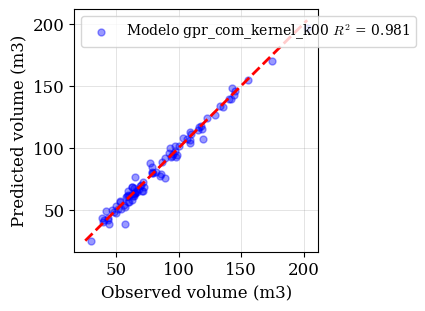

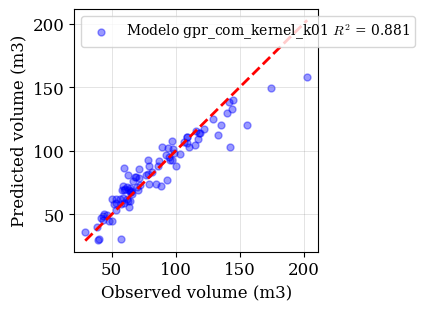

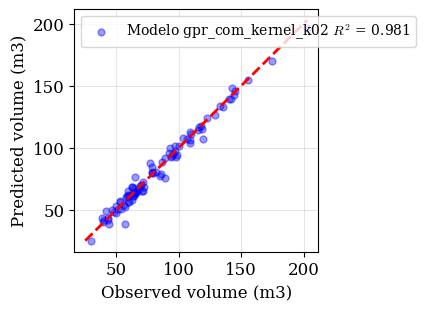

In [ ]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                            "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                            "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                        })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [13]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.25, random_state=seed)
print("Quantidade de amostras no treino", len(x_treino))
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

Quantidade de amostras no treino 225


In [14]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.20, random_state=seed)
print("Quantidade de amostras no treino", len(x_treino))
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

Quantidade de amostras no treino 240


#### Gráficos

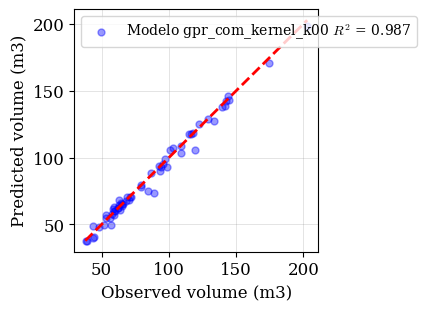

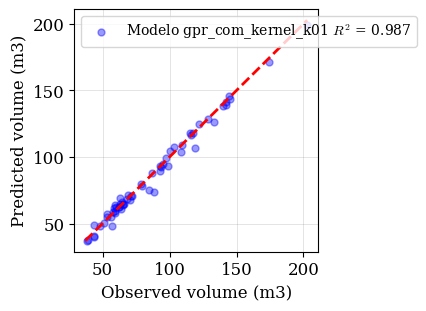

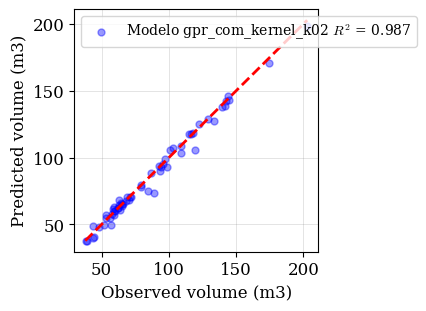

In [ ]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                        "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                        "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                    })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}_pt.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [17]:
df_gpr[0]

{'modelo': 'gpr_com_kernel_k00',
 'arquivo': 'modelos\\gpr_com_kernel_k00_pop_240.pkl',
 'R2_Treino': 1.0,
 'R2_Teste': 0.9871836685934934,
 'MAE': 2.6897269789335416,
 'RMSE': 4.011922509120517,
 'y_obse':      volume (m3)
 203    51.473726
 266    84.704794
 152    62.224340
 9      65.879054
 233   108.944798
 226   142.487214
 196   100.493238
 109    58.700570
 5     202.725883
 175    59.352505
 237    93.860512
 57     57.113152
 218   117.653686
 45    115.175999
 182    72.154378
 221    58.038135
 289    97.033905
 211    43.336240
 148    71.029238
 165   144.241440
 78     43.992820
 113    92.569359
 249    88.738842
 250   133.302689
 104   119.225235
 42     38.317242
 281   144.839721
 295    79.256791
 157    65.157430
 238    95.297198
 17     53.084493
 164    64.582768
 33     62.907511
 24    129.093492
 215   139.804356
 119    68.060285
 7      59.396402
 90     63.600059
 46     62.251226
 73     86.756869
 93    142.025481
 76     93.205719
 286    65.281645
 6